In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# loss and learning curves

In [4]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    f.suptitle(title, fontsize=14)
    ax1.plot(history['loss'], label = 'train' + exp_name)
    ax1.plot(history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., max(history['loss']+history['val_loss'])*1.1)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(min(history['accuracy']+history['val_accuracy'])*0.7, 1.1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [8]:
def csv2history(model_name, exp_name=''):
    filepath = "./histories/model_history_"+model_name+".txt"
    with open(filepath, encoding="utf-8") as f:
        epochs_str = f.read()
    epochs_list = epochs_str.split('Epoch ')
    # regex patterns
    loss_pattern = r"- loss: (\d+.\d+)"
    accuracy_pattern = "- accuracy: (\d+.\d+)"
    val_loss_pattern = r"val_loss: (\d+.\d+)"
    val_accuracy_pattern = "val_accuracy: (\d+.\d+)"
    
    history = {
    "loss": [],
    "accuracy": [],
    "val_loss": [],
    "val_accuracy": []
    }

    for epoch in epochs_list[1:]:
        loss = float(re.findall(loss_pattern, epoch)[0])
        accuracy = float(re.findall(accuracy_pattern, epoch)[0])
        val_loss = float(re.findall(val_loss_pattern, epoch)[0])
        val_accuracy = float(re.findall(val_accuracy_pattern, epoch)[0])
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_accuracy)
    
    plot_history(history, title=model_name, exp_name=exp_name)
    
    return history

## ResNet50

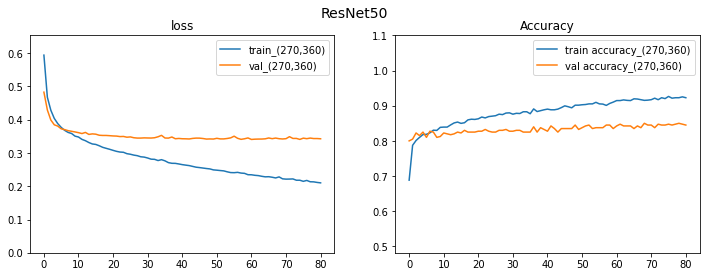

In [6]:
csv2history(model_name='ResNet50',exp_name='(270,360)');

## Xception

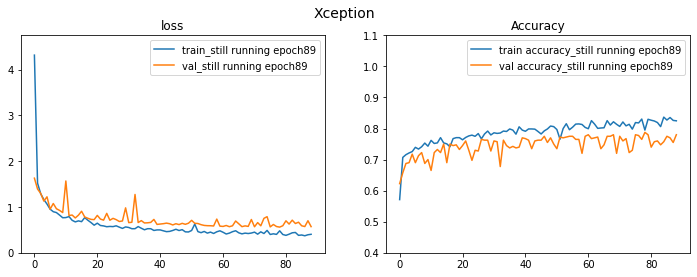

In [9]:
csv2history(model_name='Xception',exp_name='still running epoch89');

## VGG19

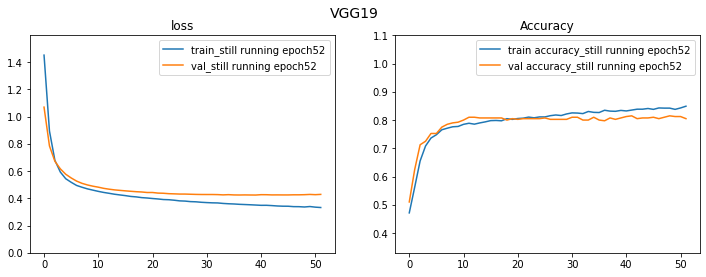

In [10]:
csv2history(model_name='VGG19',exp_name='still running epoch52');